In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
from sklearn.decomposition import KernelPCA

/Users/StevenYu/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']
symbols

['ADS.DE',
 'ALV.DE',
 'BAS.DE',
 'BAYN.DE',
 'BEI.DE',
 'BMW.DE',
 'CBK.DE',
 'CON.DE',
 'DAI.DE',
 'DB1.DE',
 'DBK.DE',
 'DPW.DE',
 'DTE.DE',
 'EOAN.DE',
 'FME.DE',
 'FRE.DE',
 'HEI.DE',
 'HEN3.DE',
 'IFX.DE',
 'LHA.DE',
 'LIN.DE',
 'LXS.DE',
 'MRK.DE',
 'MUV2.DE',
 'RWE.DE',
 'SAP.DE',
 'SDF.DE',
 'SIE.DE',
 'TKA.DE',
 'VOW3.DE',
 '^GDAXI']

In [4]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
data= data.dropna()

CPU times: user 364 ms, sys: 89 ms, total: 453 ms
Wall time: 18.5 s


In [5]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [6]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2010-01-04,38.505,88.54,44.850,56.40,46.445,32.050
2010-01-05,39.720,88.81,44.170,55.37,46.200,32.310
2010-01-06,39.400,89.50,44.450,55.02,46.165,32.810
2010-01-07,39.745,88.47,44.155,54.30,45.700,33.100
2010-01-08,39.600,87.99,44.020,53.82,44.380,32.655


In [7]:
scale_function = lambda x: (x-x.mean()) / x.std()

In [8]:
pca = KernelPCA().fit(data.apply(scale_function))

In [9]:
len(pca.lambdas_)

829

In [10]:
pca.lambdas_[:10].round()

array([ 31009.,   5791.,   4613.,   2359.,   1496.,    951.,    502.,
          310.,    237.,    227.])

In [11]:
get_weights = lambda x: x/x.sum()

In [12]:
get_weights(pca.lambdas_)[:10]

array([ 0.64080881,  0.11967952,  0.09533588,  0.04874552,  0.03090794,
        0.01965958,  0.01036929,  0.00639797,  0.00489951,  0.00468967])

In [13]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

/Users/StevenYu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


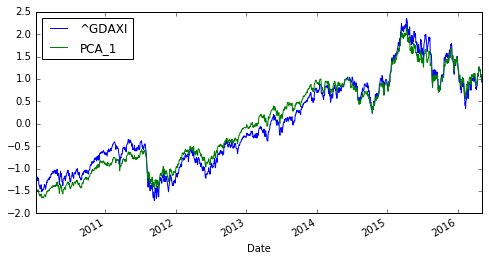

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8,4))

In [22]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_weights(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

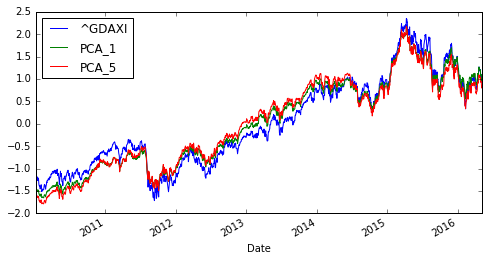

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8,4))

In [26]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index)
mpl_dates

AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'